In [1]:
from population import Population
from group_testing import GollierHouseholdGroupTest

n_households = 100000
household_size_dist = [0.25] * 4
prevalence = 0.005
SAR = 0.7
R0 = 3.5
d0 = 14
fatality_pct = 0.02
initial_quarantine=False

#TODO: include FNR

pop = Population(n_households, household_size_dist, prevalence, SAR, R0, d0, fatality_pct, initial_quarantine, FNR=0.3)
golliertest = GollierHouseholdGroupTest(infection_pct_blf=prevalence)

In [2]:
from simulation import Simulation
from copy import copy
test_freq = 5
simulation_gollier = Simulation(pop, golliertest, test_freq)


In [3]:
for _ in range(60):
    simulation_gollier.step()

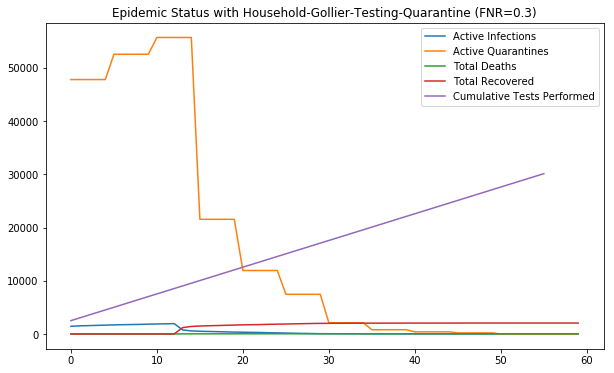

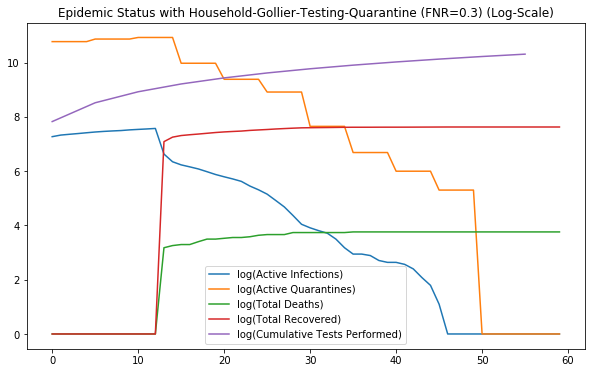

In [5]:
# plot total infected
import matplotlib.pyplot as plt
from math import log

simulation = simulation_gollier

days = range(simulation.current_day)
active_infections = [simulation.recorded_data[day]['total_infected']+1 for day in days]
active_quarantines = [simulation.recorded_data[day]['individuals_quarantined']+1 for day in days]
total_deaths = [simulation.recorded_data[day]['total_dead']+1 for day in days]
total_recovered = [simulation.recorded_data[day]['total_recovered']+1 for day in days]

test_days = [day for day in days if simulation.recorded_data[day]['grp_test_data'] is not None]
cumulative_tests = [
    sum([simulation.recorded_data[prev_test_day]['grp_test_data']['num_grps'] for 
         prev_test_day in test_days if prev_test_day <= curr_test_day])
    for curr_test_day in test_days
]

plt.figure(figsize=(10,6))
plt.plot(days, active_infections, label='Active Infections')
plt.plot(days, active_quarantines, label='Active Quarantines')
plt.plot(days, total_deaths, label='Total Deaths')
plt.plot(days, total_recovered, label='Total Recovered')

plt.plot(test_days, cumulative_tests, label='Cumulative Tests Performed')

plt.legend()
plt.title("Epidemic Status with Household-Gollier-Testing-Quarantine (FNR=0.3)")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(days, list(map(log, active_infections)), label='log(Active Infections)')
plt.plot(days, list(map(log, active_quarantines)), label='log(Active Quarantines)')
plt.plot(days, list(map(log, total_deaths)), label='log(Total Deaths)')
plt.plot(days, list(map(log, total_recovered)), label='log(Total Recovered)')

plt.plot(test_days, list(map(log,cumulative_tests)), label='log(Cumulative Tests Performed)')


plt.legend(loc='best')
plt.title("Epidemic Status with Household-Gollier-Testing-Quarantine (FNR=0.3) (Log-Scale)")
plt.show()
